In [292]:
# importando las librerias 

#limpieza y transformacion de datos
import pandas as pd
import numpy as np
import janitor
import missingno

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

### Set de estilo de los graficos 

In [293]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (9, 7.4)

### Cargando los datos 

In [294]:
df = (
    pd.read_csv("/home/astin/Documents/MypythonBriefcase/visual/job_test/BI_analyst/data/raw/BIChallenge_Templaris - BusinessBIBA_Challenge.csv") 
)

### Conociendo los datos 

In [295]:
df.describe()


,Unnamed: 0,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
count,12756.000000,12756.000000,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000,1046.000000
mean,6377.500000,2516.923330,39.695681,14479.800664,39.663787,2009.774234,42298.432122,1.964627
std,3682.484352,1465.606943,5.924762,14520.262941,5.751843,10034.936766,16757.547428,1.116938
min,0.000000,1.000000,30.000000,0.000000,30.000000,0.342075,11560.000000,0.000000
25%,3188.750000,1204.000000,35.000000,3800.000000,35.000000,67.888982,44100.000000,1.000000
50%,6377.500000,2571.000000,40.000000,9800.000000,40.000000,265.086727,44620.000000,2.000000
75%,9566.250000,3801.000000,45.000000,20100.000000,45.000000,1061.080947,53100.000000,3.000000
max,12755.000000,4999.000000,49.000000,108300.000000,49.000000,412498.523200,64000.000000,5.000000


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12756 non-null  int64  
 1   ID              12756 non-null  int64  
 2   UPDATE          12756 non-null  object 
 3   STATUS          7940 non-null   object 
 4   MOTIVE          2298 non-null   object 
 5   INTEREST_RATE   1505 non-null   float64
 6   AMOUNT          1505 non-null   float64
 7   CAT             1505 non-null   float64
 8   TXN             3773 non-null   float64
 9   CP              1046 non-null   float64
 10  DELIVERY_SCORE  1046 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ MB


### Modificando el tipo de los datos

In [297]:
# df['UPDATE'] = pd.to_timedelta(df['UPDATE'],errors='coerce')# EL parametro errors permita elgir la forma en la cual manejamos los errores

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12756 non-null  int64  
 1   ID              12756 non-null  int64  
 2   UPDATE          12756 non-null  object 
 3   STATUS          7940 non-null   object 
 4   MOTIVE          2298 non-null   object 
 5   INTEREST_RATE   1505 non-null   float64
 6   AMOUNT          1505 non-null   float64
 7   CAT             1505 non-null   float64
 8   TXN             3773 non-null   float64
 9   CP              1046 non-null   float64
 10  DELIVERY_SCORE  1046 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ MB


In [299]:
df.shape

(12756, 11)

### ELiminando la columa Unnamed

In [300]:
df.drop(columns='Unnamed: 0', inplace=True)


### Tenemos datos faltantes 

In [301]:
(
    df
    .isnull()
    .any()
)

ID                False
UPDATE            False
STATUS             True
MOTIVE             True
INTEREST_RATE      True
AMOUNT             True
CAT                True
TXN                True
CP                 True
DELIVERY_SCORE     True
dtype: bool

### Cuantos datos faltantes tenemos 

In [302]:
(
    df
    .isnull()
    .sum()
)

ID                    0
UPDATE                0
STATUS             4816
MOTIVE            10458
INTEREST_RATE     11251
AMOUNT            11251
CAT               11251
TXN                8983
CP                11710
DELIVERY_SCORE    11710
dtype: int64

In [303]:
(
    df
    .isnull()
    .sum()
    .sum()
)

81430

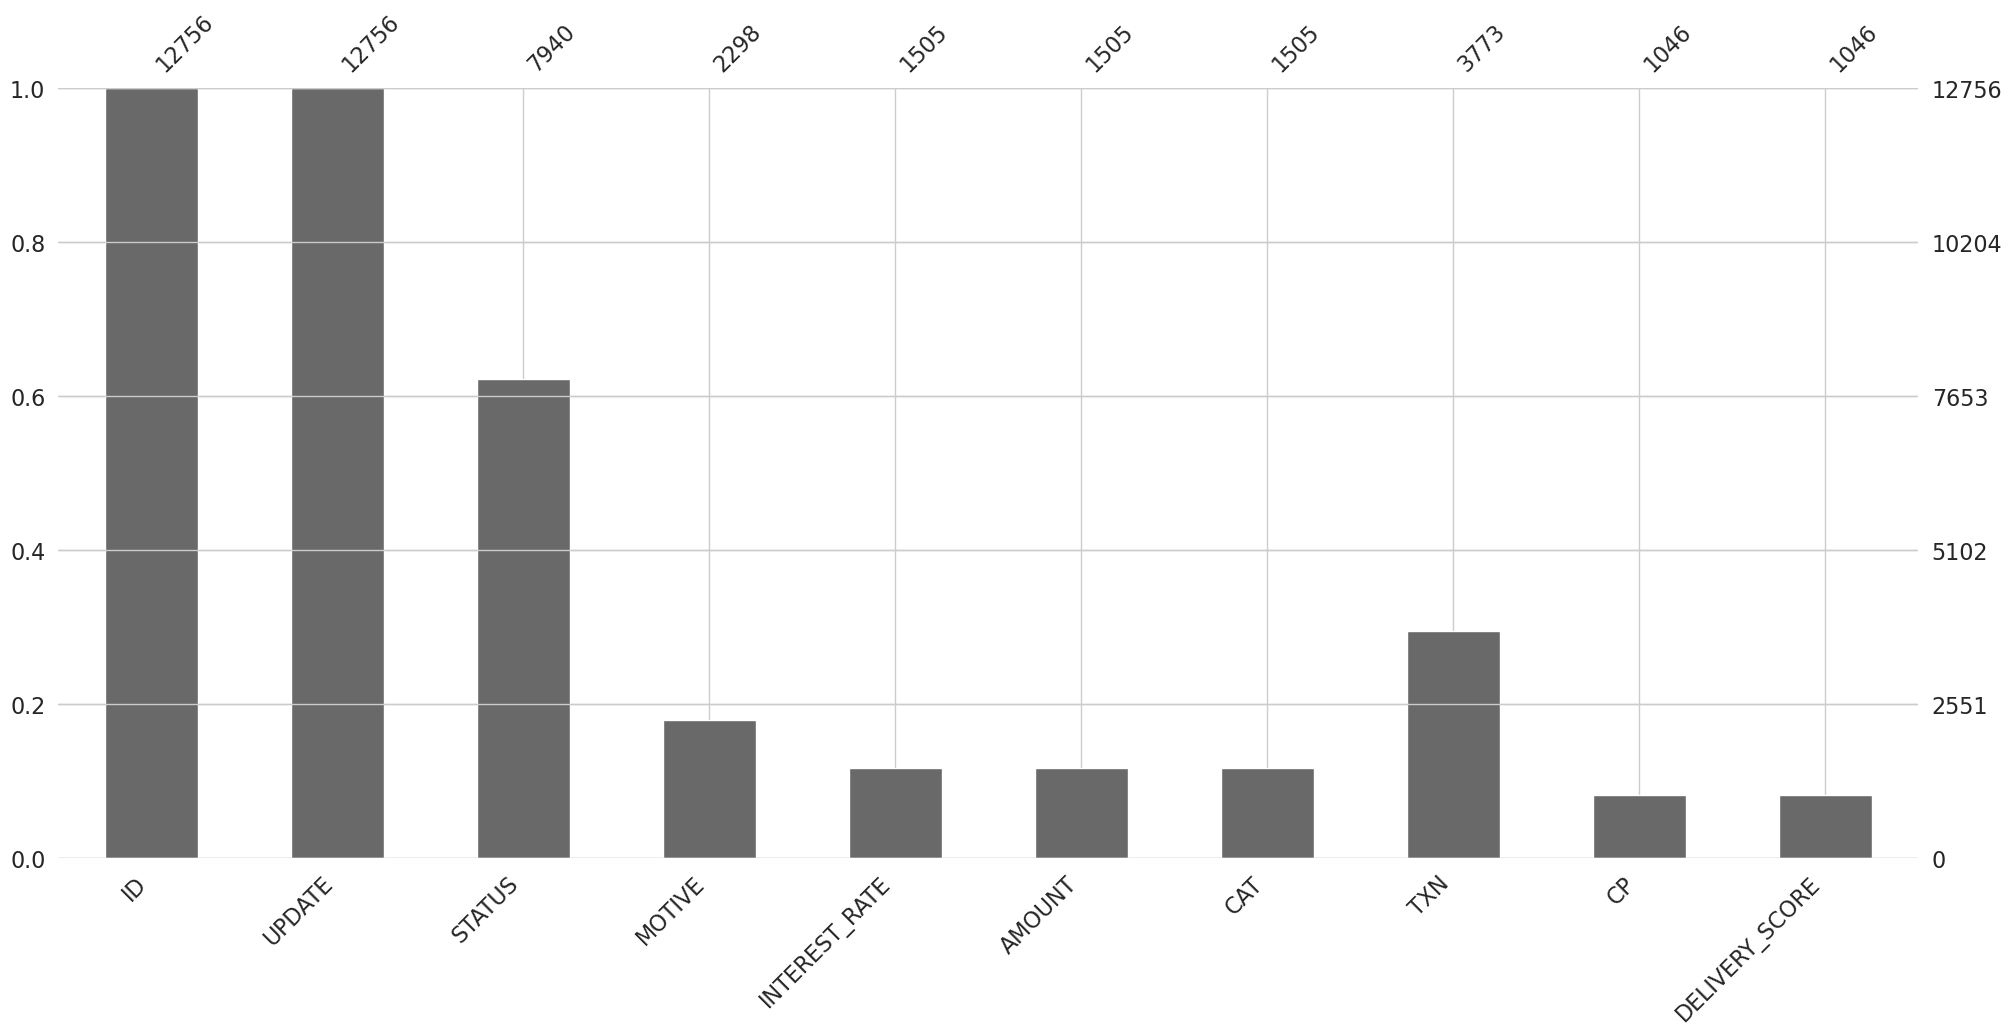

In [304]:
(
    missingno.bar(df=df)
);

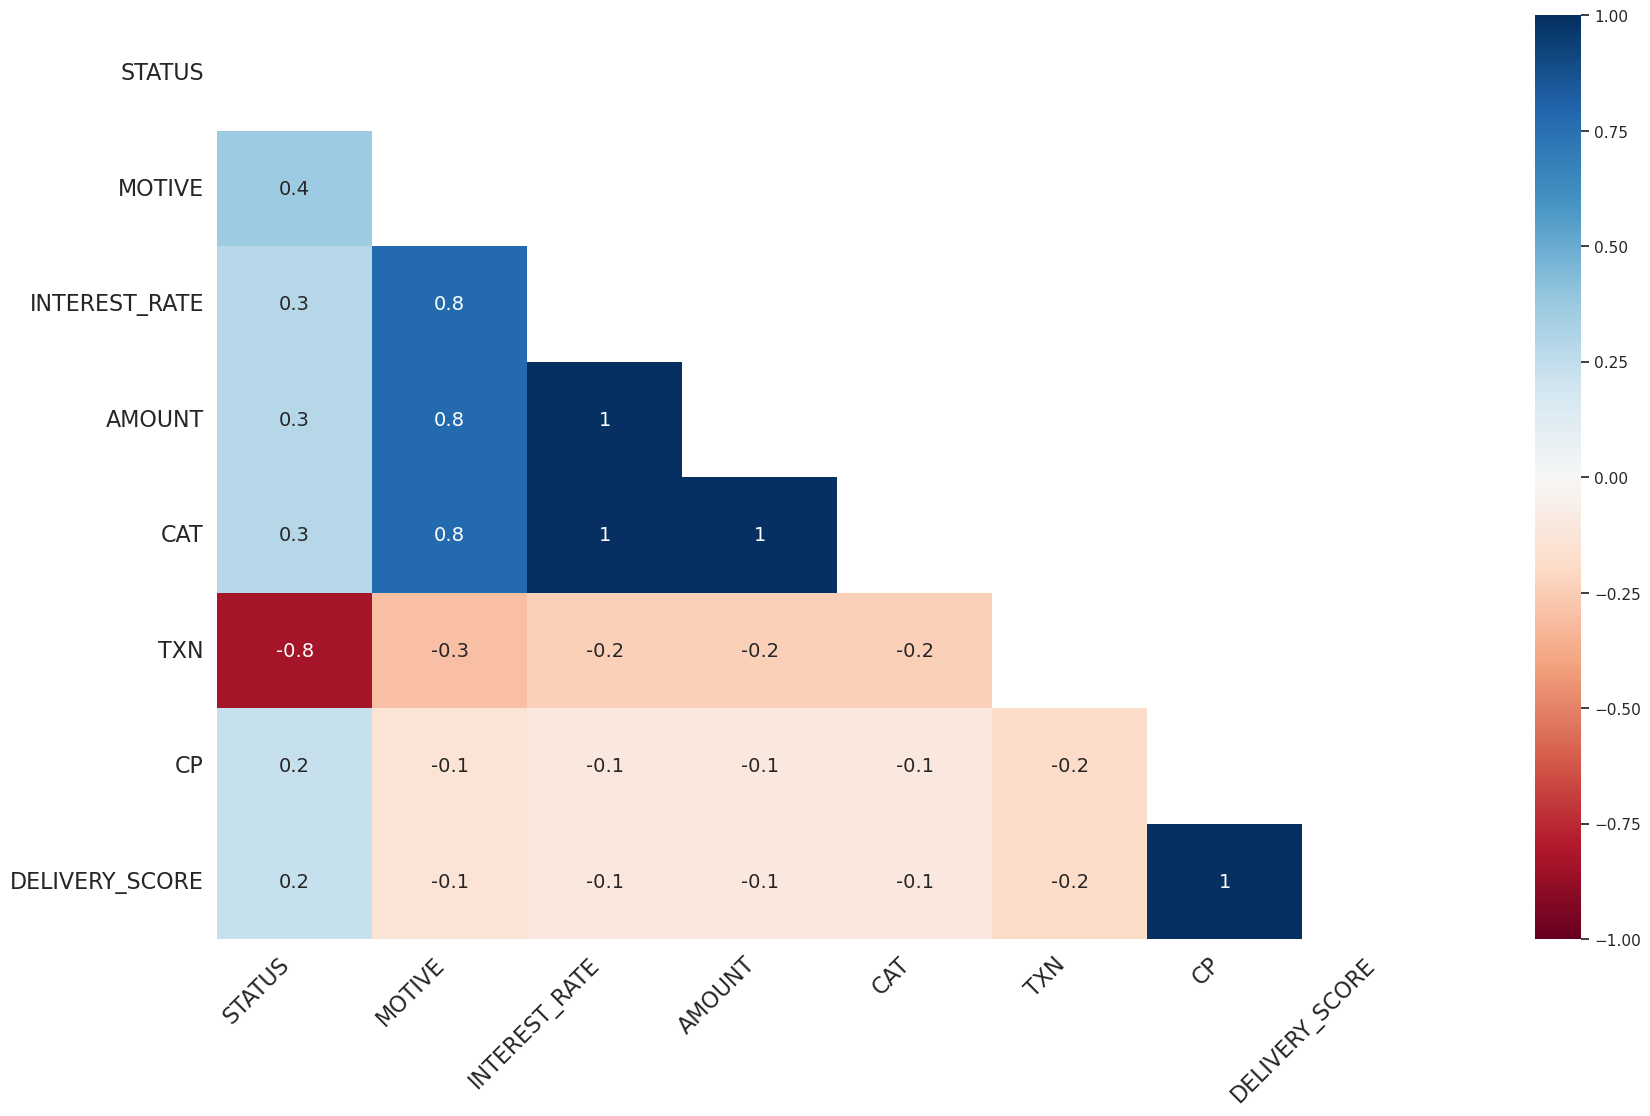

In [305]:
(
    missingno.heatmap(df=df)
);

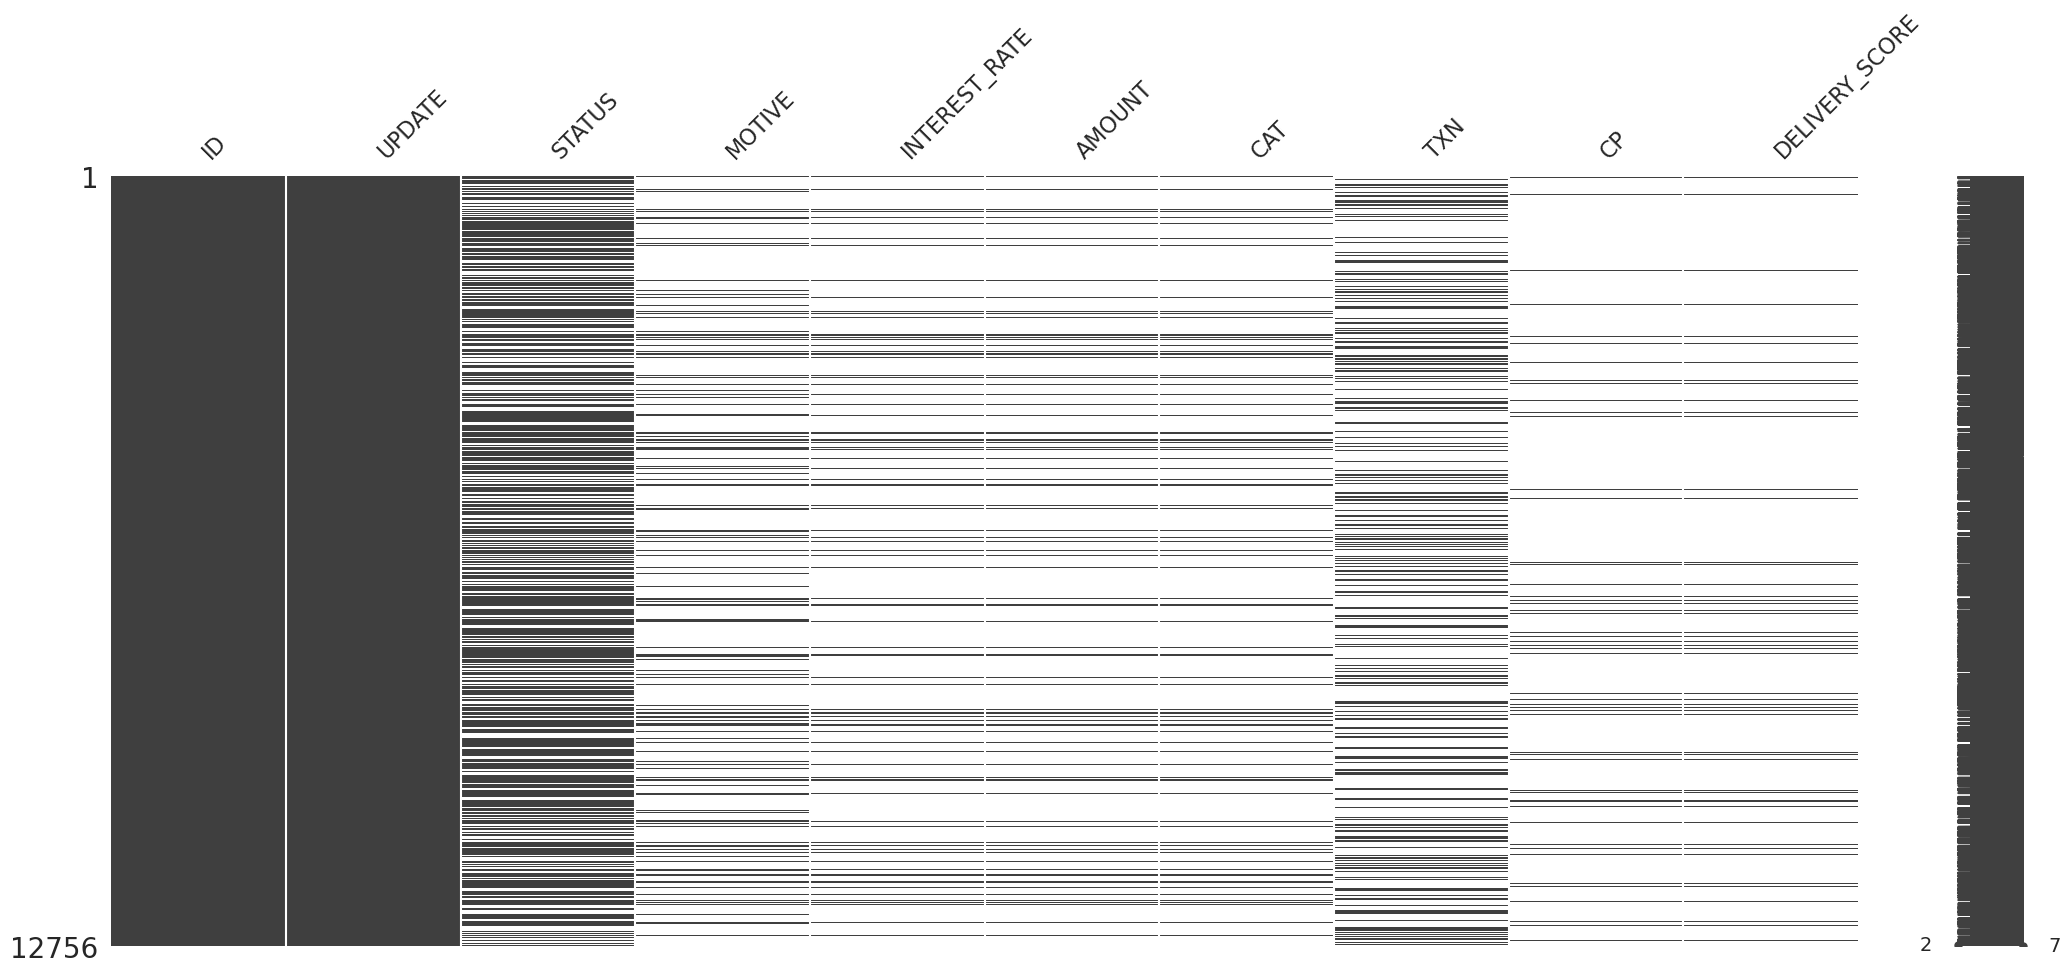

In [306]:
(
    missingno.matrix(df=df)
);

In [307]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Manejo de Datos implicitos y Explicitos 

In [308]:
for indice_fila, fila in df.iterrows():
    if pd.isna(fila['STATUS']) and pd.notna(fila['TXN']):
        df.at[indice_fila, 'STATUS'] = "TRANSACTION"

In [309]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,UNANSWERED,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# "UNANSWERED"